# PREDICTING STOCK PRICES 

In [1]:
import pandas as pd
import numpy as np 
df=pd.read_csv("Carriage Services_ Inc.csv",index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-30,26.290001,26.440001,25.920000,26.320000,26.035059,150900
2017-05-31,26.430000,26.490000,25.930000,26.290001,26.005384,94600
2017-06-01,26.480000,26.650000,26.240000,26.629999,26.341703,64500
2017-06-02,26.629999,27.379999,26.629999,26.910000,26.618671,81100
2017-06-05,26.900000,26.930000,26.590000,26.730000,26.440620,54200


In [2]:
df.shape

(252, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-05-30 to 2018-05-29
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


# creating a new column to use 

In [4]:
df['average']=(df['Open']+df['Close'])/2

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,average
Date,,,,,,,
2017-05-30,26.290001,26.440001,25.920000,26.320000,26.035059,150900,26.305000
2017-05-31,26.430000,26.490000,25.930000,26.290001,26.005384,94600,26.360000
2017-06-01,26.480000,26.650000,26.240000,26.629999,26.341703,64500,26.555000
2017-06-02,26.629999,27.379999,26.629999,26.910000,26.618671,81100,26.769999
2017-06-05,26.900000,26.930000,26.590000,26.730000,26.440620,54200,26.815000


# Cleaning by  column names consistancy 

In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'average'], dtype='object')

In [7]:
df.columns=df.columns.str.lower()
df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'average'], dtype='object')

renaming adj close to adj_close

In [8]:
df.rename(columns={'adj close':'adj_close'}).head()

,open,high,low,close,adj_close,volume,average
Date,,,,,,,
2017-05-30,26.290001,26.440001,25.920000,26.320000,26.035059,150900,26.305000
2017-05-31,26.430000,26.490000,25.930000,26.290001,26.005384,94600,26.360000
2017-06-01,26.480000,26.650000,26.240000,26.629999,26.341703,64500,26.555000
2017-06-02,26.629999,27.379999,26.629999,26.910000,26.618671,81100,26.769999
2017-06-05,26.900000,26.930000,26.590000,26.730000,26.440620,54200,26.815000


# view our data trend on the average new column

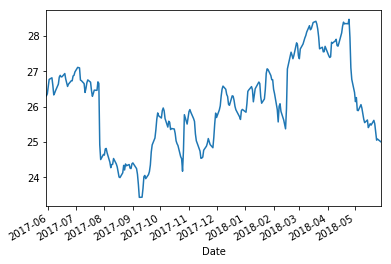

In [9]:
%matplotlib inline
import seaborn; seaborn.set()
df.average.plot()

picking out the two array we need for our model 

    the  Date and the average 
    
Fisrt we reset 

In [10]:
df=df.reset_index()

In [11]:
df.columns

Index(['Date', 'open', 'high', 'low', 'close', 'adj close', 'volume',
       'average'],
      dtype='object')

In [12]:
df.head()

,Date,open,high,low,close,adj close,volume,average
0,2017-05-30,26.290001,26.440001,25.920000,26.320000,26.035059,150900,26.305000
1,2017-05-31,26.430000,26.490000,25.930000,26.290001,26.005384,94600,26.360000
2,2017-06-01,26.480000,26.650000,26.240000,26.629999,26.341703,64500,26.555000
3,2017-06-02,26.629999,27.379999,26.629999,26.910000,26.618671,81100,26.769999
4,2017-06-05,26.900000,26.930000,26.590000,26.730000,26.440620,54200,26.815000


In [39]:
import datetime as dt
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))

In [41]:
df.head()

,Date,open,high,low,close,adj close,volume,average
0,2017-05-30,26.290001,26.440001,25.920000,26.320000,26.035059,150900,26.305000
1,2017-05-31,26.430000,26.490000,25.930000,26.290001,26.005384,94600,26.360000
2,2017-06-01,26.480000,26.650000,26.240000,26.629999,26.341703,64500,26.555000
3,2017-06-02,26.629999,27.379999,26.629999,26.910000,26.618671,81100,26.769999
4,2017-06-05,26.900000,26.930000,26.590000,26.730000,26.440620,54200,26.815000


In [46]:
df['Date']=df['Date'].apply(lambda x: int(''.join(x.split('-'))))

In [47]:
df.head()

,Date,open,high,low,close,adj close,volume,average
0,20170530,26.290001,26.440001,25.920000,26.320000,26.035059,150900,26.305000
1,20170531,26.430000,26.490000,25.930000,26.290001,26.005384,94600,26.360000
2,20170601,26.480000,26.650000,26.240000,26.629999,26.341703,64500,26.555000
3,20170602,26.629999,27.379999,26.629999,26.910000,26.618671,81100,26.769999
4,20170605,26.900000,26.930000,26.590000,26.730000,26.440620,54200,26.815000


In [48]:
df.dtypes

Date           int64
open         float64
high         float64
low          float64
close        float64
adj close    float64
volume         int64
average      float64
dtype: object

In [49]:
date=df['Date'].values
price=df['average'].values

In [59]:
type(date),type(price)

(numpy.ndarray, numpy.ndarray)

In [14]:
date.shape,price.shape

((252,), (252,))

reshaping

In [61]:
X=date.reshape(252,1)
y=price.reshape(252,)
X.shape,y.shape

((252, 1), (252,))

# creating the model,from a suport vector machine class ,the SVR
    
  we are going to fine tune the kernel parameter manualy and pick the best performer of this

In [62]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# creating the train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.1,random_state=42)

# creating a pipeline
this is for preprossesing just incase our file had missing data 

In [63]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

imp=Imputer(missing_values='NaN',strategy='mean',axis=0)
steps=[('imputer',imp),('SVR',SVR())]
pipeline=Pipeline(steps)


from the documentation we that we see can find the hyper parameters that can be tuned 
tune the : kernel,C ,gamma and dgree ,lets Do some grid search on them

In [ ]:
param_grid={'kernel':['linear','poly','rbf'],'C':np.array([1e0,1e1]), 
            'degree':np.array([2,3]),'gamma':[0.05,0.1,0.2,0.4]}
#

gm_cv=GridSearchCV(SVR(),param_grid,cv=10)#,param_grid
gm_cv.fit(X_train,y_train)

#predicting with the best parameters
y_pred=gm_cv.prdict(X_test)

#scoring
r2=gm_cv.score(X_test,y_test)

print('the best parameteers were'+gm_cv.best_params_)
print('with an R squared score of '+ r2)

In [ ]:
SVR.get_params(SVR).keys()

In [ ]:
# plotting

In [ ]:
plt.plot(X_date,y_price,color='green',label='The Actual')
plt.plot(X_date,y_pred,color='green',label='The Best Of Our Model')
plt.xlabel('dates')
plt.ylabel('prices')
plt.title('suport vector regression')
plt.legend()
plt.grid(True)
plt.show()

# visualizing the models one by one

initializing and fitting the models

In [ ]:
svr_lin=SVR#(kernel='linear',C=1e3)
svr_poly=SVR(kernel='poly',C=1e3,degree=2)
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)

svr_lin.fit(date,price)
svr_poly.fit(X_train,y_train)
svr_rbf.fit(X_train,y_train)

In [21]:
X_train

array([['2018-02-23T00:00:00.000000000'],
       ['2018-04-12T00:00:00.000000000'],
       ['2017-06-13T00:00:00.000000000'],
       ['2018-01-19T00:00:00.000000000'],
       ['2017-12-15T00:00:00.000000000'],
       ['2017-10-13T00:00:00.000000000'],
       ['2017-11-24T00:00:00.000000000'],
       ['2017-09-25T00:00:00.000000000'],
       ['2018-04-04T00:00:00.000000000'],
       ['2017-07-05T00:00:00.000000000'],
       ['2017-11-01T00:00:00.000000000'],
       ['2017-06-23T00:00:00.000000000'],
       ['2018-03-22T00:00:00.000000000'],
       ['2018-02-16T00:00:00.000000000'],
       ['2017-09-01T00:00:00.000000000'],
       ['2017-12-05T00:00:00.000000000'],
       ['2018-01-10T00:00:00.000000000'],
       ['2017-12-20T00:00:00.000000000'],
       ['2017-08-02T00:00:00.000000000'],
       ['2018-02-12T00:00:00.000000000'],
       ['2017-06-21T00:00:00.000000000'],
       ['2017-08-31T00:00:00.000000000'],
       ['2017-12-19T00:00:00.000000000'],
       ['2018-02-07T00:00:00.00000

predicting 

In [ ]:
y_pred_lin=svr_lin.predict(X_test)
y_pred_poly=svr_poly.predict(X_test)
y_pred_rbf=svr_rbf.predict(X_test)

plotting

In [ ]:
plt.scatter(X_dates,y_price,c='black',label='Data')
plt.plot(X_date,y_pred_lin,color='red',label='linear Kernel')
#plt.plot(X_date,y_pred_poly,color='blue',label='Poly Kernel')
#plt.plot(X_date,y_pred_rbf,color='green',label='RBF Kernel')
plt.xlabel('dates')
plt.ylabel('prices')
plt.title('suport vector regression')
plt.legend()
plt.grid(True)
plt.show()